array([86663.08509535, 85475.14463386, 83834.65542514, 81911.32324939,
       80327.40263407, 79478.87373301, 78121.22749131, 75292.79782109,
       70201.62441471, 65506.43116215, 61207.21806343, 54871.53560215])

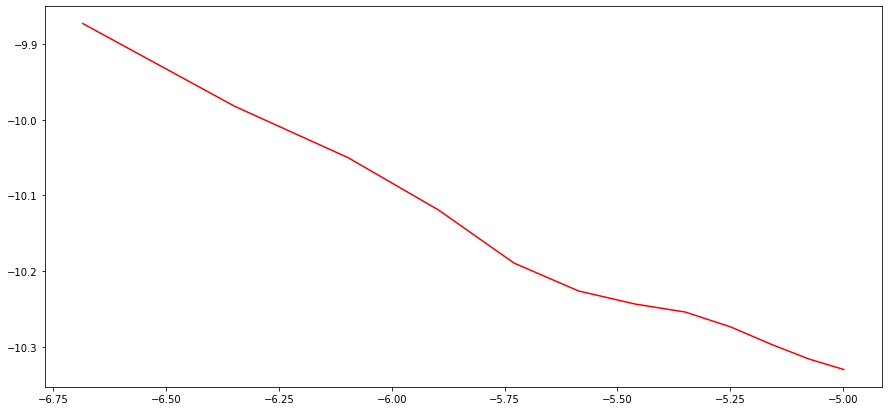

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def rulefour(Q, const, delt, vals):
    return np.abs(Q)*np.sqrt(np.sum((const*delt/vals)**2))


'Channel A' #<<<<< BEST

testALength = [.07,.01] # [far, near] in meters 
testAVoltage = [6.65,4.5] # [V[far], V[near]] in volts

'Channel B'

testBLength = [.07,.01] # [far, near] in meters
testBVoltage = [9.15,4.27] # [V[far], V[near]] in volts

'Channel C'

testCLength = [.07,.01] # [far, near] in meters
testCVoltage = [8.15,3.71] # [V[far], V[near]] in volts

ChannelA_length = [.007,.0065,.006,.0055,.005,.0045,.004,.0035,.003,.0025,.002,.0015,.001]
ChannelA_voltage = [7.68, 7.64,7.47,7.35,7.13,7.07,6.98,6.83,6.48,5.93,5.65,5.17,4.53]

DV = [0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(ChannelA_voltage)):
    if(i != len(ChannelA_voltage)-1):
        DV[i] = ChannelA_voltage[i] + ChannelA_voltage[i+1]

r_mids = [0.00675,0.00625,0.00575,0.00525,0.00475,0.00425,0.00375,0.00325,0.00275,0.00225,0.00175,0.00125]
R_0 = 1.0 # meters
E_0 = 1.0 # Volts/meters
r_mids = np.array(r_mids)
DV = np.array(DV)
DR = .0005
E=(DV/DR)
dR = 0.001

dDV = np.sqrt(0.01**2+0.01**2)
dDR = np.sqrt(0.001**2+0.001**2)

def ruleFour(Q,consts,deltas,vals):
    dQ = np.abs(Q)*np.sqrt(np.sum((consts*deltas/vals)**2))
    return dQ
               
y= np.log(E/E_0)
x= np.log(r_mids/R_0)

plt.figure(figsize=(15,7))
plt.plot(x,-y, 'r-')
DV = np.append(DV,DR)
dE = rulefour(E, np.array([1,1,1,1,1,1,1,1,1,1,1,1,-1]), np.array([dDV,dDV,dDV,dDV,dDV,dDV,dDV,dDV,dDV,dDV,dDV,dDV,dDR]),DV)
dy = rulefour(y, np.array([1,1,1,1,1,1,1,1,1,1,1,1]), np.array([dE,dE,dE,dE,dE,dE,dE,dE,dE,dE,dE,dE,dE,dE,dE,dE]), E)

y= -y # for proper slope

E
dE

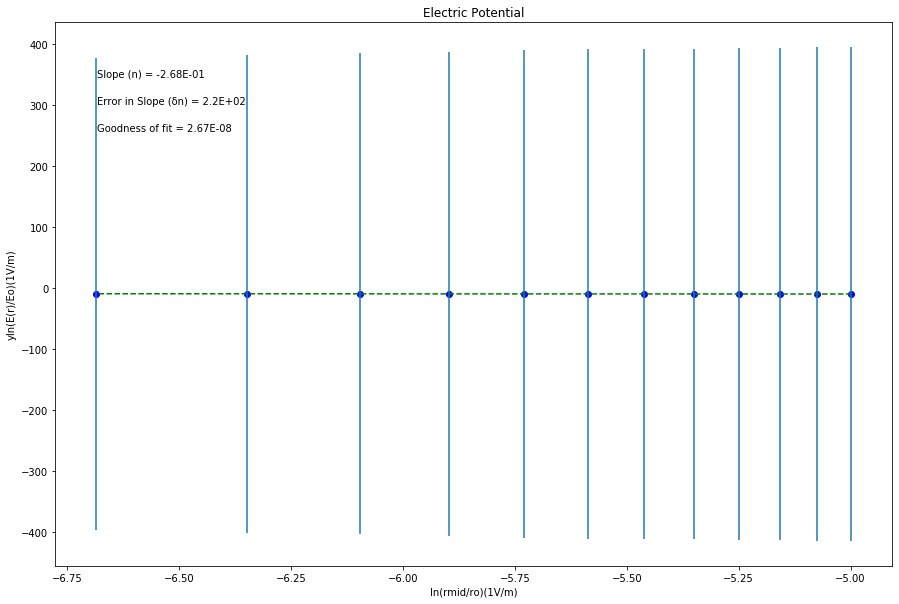

In [36]:
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic


#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('ln(rmid/ro)(1V/m)')
plt.ylabel('yln(E(r)/Eo)(1V/m)')
plt.title('Electric Potential')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (n) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (δn) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()

In [3]:
print('The slope(n) =', m, '±', dm)

The slope(n) = -0.2681173586311883 ± 0.02168446299119791
